**Mount Google drive**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


**clone git repo**

In [ ]:
%cd /content/gdrive/MyDrive/

/content/gdrive/MyDrive


In [ ]:
!git clone https://github.com/danukadj/visualDet3D.git

fatal: destination path 'visualDet3D' already exists and is not an empty directory.


**give access permissions**

In [ ]:
!chmod 755 -R /content/gdrive/MyDrive/visualDet3D

^C


In [ ]:
%cd visualDet3D

/content/gdrive/MyDrive/visualDet3D


**requirement setup**

In [ ]:
!pip3 install -r requirement.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 87 kB 5.3 MB/s 
  Created wheel for fire: filename=fire-0.4.0-py2.py3-none-any.whl size=115943 sha256=251ce4ac794fc74e5a6e0cb0b28234eb57d1e87df0f81ff63481b29682674455
  Stored in directory: /root/.cache/pip/wheels/8a/67/fb/2e8a12fa16661b9d5af1f654bd199366799740a85c64981226
Successfully built fire


In [2]:
! ./make.sh

In [ ]:
!pip install coloredlogs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 46 kB 3.4 MB/s 
     |████████████████████████████████| 86 kB 5.3 MB/s 


**Kitti Dataset download**

In [ ]:
!wget -P '/content/gdrive/MyDrive/KittiDataSet/f' https://s3.eu-central-1.amazonaws.com/avg-kitti/data_scene_flow.zip
!wget -P '/content/gdrive/MyDrive/KittiDataSet/f' https://s3.eu-central-1.amazonaws.com/avg-kitti/data_scene_flow_calib.zip
!wget -P '/content/gdrive/MyDrive/KittiDataSet/f' https://s3.eu-central-1.amazonaws.com/avg-kitti/data_scene_flow_multiview.zip
!wget -P '/content/gdrive/MyDrive/KittiDataSet/f' https://s3.eu-central-1.amazonaws.com/avg-kitti/devkit_scene_flow.zip

--2023-03-10 04:21:11--  https://s3.eu-central-1.amazonaws.com/avg-kitti/data_scene_flow.zip
Resolving s3.eu-central-1.amazonaws.com (s3.eu-central-1.amazonaws.com)... 52.219.169.173
Connecting to s3.eu-central-1.amazonaws.com (s3.eu-central-1.amazonaws.com)|52.219.169.173|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1681488619 (1.6G) [application/zip]
Saving to: ‘/content/gdrive/MyDrive/KittiDataSet/f/data_scene_flow.zip’

data_scene_flow.zip 100%[===================>]   1.57G  43.7MB/s    in 41s     

2023-03-10 04:21:52 (38.8 MB/s) - ‘/content/gdrive/MyDrive/KittiDataSet/f/data_scene_flow.zip’ saved [1681488619/1681488619]

--2023-03-10 04:21:52--  https://s3.eu-central-1.amazonaws.com/avg-kitti/data_scene_flow_calib.zip
Resolving s3.eu-central-1.amazonaws.com (s3.eu-central-1.amazonaws.com)... 52.219.140.23
Connecting to s3.eu-central-1.amazonaws.com (s3.eu-central-1.amazonaws.com)|52.219.140.23|:443... connected.
HTTP request sent, awaiting response...

In [ ]:
!unzip -qq "/content/gdrive/MyDrive/KittiDataSet/f/data_scene_flow.zip" -d /content/gdrive/MyDrive//KittiDataSet/f/data_scene_flow/
!unzip -qq "/content/gdrive/MyDrive/KittiDataSet/f/data_scene_flow_calib.zip" -d /content/gdrive/MyDrive//KittiDataSet/f/data_scene_flow_calib/
!unzip -qq "/content/gdrive/MyDrive/KittiDataSet/f/data_scene_flow_multiview.zip" -d /content/gdrive/MyDrive//KittiDataSet/f/data_scene_flow_multiview/
!unzip -qq "/content/gdrive/MyDrive/KittiDataSet/f/devkit_scene_flow.zip" -d /content/gdrive/MyDrive//KittiDataSet/f/devkit_scene_flow/

**Kitti dataset add to kiiti_obj directory**

In [ ]:
# Create Dataset Folder 
%mkdir /content/gdrive/MyDrive/visualDet3D/visualDet3D/data/kitti_obj

mkdir: cannot create directory ‘/content/gdrive/MyDrive/visualDet3D/visualDet3D/data/kitti_obj’: File exists


In [ ]:
!unzip -qq "/content/gdrive/MyDrive/KittiDataSet/data_object_calib.zip" -d /content/gdrive/MyDrive/visualDet3D/visualDet3D/data/kitti_obj/
!unzip -qq "/content/gdrive/MyDrive/KittiDataSet/data_object_image_2.zip" -d /content/gdrive/MyDrive/visualDet3D/visualDet3D/data/kitti_obj/
!unzip -qq "/content/gdrive/MyDrive/KittiDataSet/data_object_image_3.zip" -d /content/gdrive/MyDrive/visualDet3D/visualDet3D/data/kitti_obj/
!unzip -qq "/content/gdrive/MyDrive/KittiDataSet/data_object_label_2.zip" -d /content/gdrive/MyDrive/visualDet3D/visualDet3D/data/kitti_obj/

replace /content/gdrive/MyDrive/visualDet3D/visualDet3D/data/kitti_obj/training/calib/003206.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: replace /content/gdrive/MyDrive/visualDet3D/visualDet3D/data/kitti_obj/training/label_2/003206.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

**create workdirectory**

In [ ]:
%mkdir /content/gdrive/MyDrive/visualDet3D/workdirs

mkdir: cannot create directory ‘/content/gdrive/MyDrive/visualDet3D/workdirs’: File exists


**create cofig file**

first update paths in Stereo3D_example , then

In [ ]:
# Make config file
import os
%cd config

if not os.path.exists('/content/gdrive/MyDrive/visualDet3D/config/config.py'):
  # Copy Yolo3D_example to make .py file
  %cp Stereo3D_example config.py


[Errno 2] No such file or directory: 'config'
/content/gdrive/MyDrive/visualDet3D/config


In [ ]:
%cd ..
%pwd

/content/gdrive/MyDrive/visualDet3D


'/content/gdrive/MyDrive/visualDet3D'

**Import Libraries**

In [ ]:
import sys
# sys.path.append("../")
import importlib
import os
import copy
import numpy as np
import matplotlib.pyplot as plt
import cv2
import cython
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torch.utils.tensorboard import SummaryWriter
from torchvision import datasets, models, transforms
import torchvision
from visualDet3D.data.kitti.utils import write_result_to_file
from visualDet3D.utils.utils import LossLogger, cfg_from_file
from visualDet3D.networks.utils.registry import DETECTOR_DICT, DATASET_DICT, PIPELINE_DICT
from visualDet3D.networks.heads.anchors import Anchors
from visualDet3D.networks.lib.fast_utils.hill_climbing import post_opt
from visualDet3D.networks.utils import BBox3dProjector, BackProjection
from visualDet3D.utils.utils import convertAlpha2Rot, convertRot2Alpha, draw_3D_box, compound_annotation
import visualDet3D.data.kitti.dataset
from visualDet3D.utils.timer import Timer
from numba import jit
from tqdm import tqdm
print('CUDA available: {}'.format(torch.cuda.is_available()))

cfg = cfg_from_file("config/config.py")
is_test_train = True

checkpoint_name = "Stereo3D_latest.pth"

CUDA available: True


In [ ]:
%pwd

'/content/gdrive/MyDrive/visualDet3D'

**Precomputation**

In [ ]:
## Compute image database and anchors mean/std
!./launchers/det_precompute.sh config/config.py train
!./launchers/det_precompute.sh config/config.py test

Precomputation for the training/validation split
start reading training data
Traceback (most recent call last):
  File "scripts/imdb_precompute_3d.py", line 213, in <module>
    Fire(main)
  File "/usr/local/lib/python3.7/dist-packages/fire/core.py", line 141, in Fire
    component_trace = _Fire(component, args, parsed_flag_args, context, name)
  File "/usr/local/lib/python3.7/dist-packages/fire/core.py", line 471, in _Fire
    target=component.__name__)
  File "/usr/local/lib/python3.7/dist-packages/fire/core.py", line 681, in _CallAndUpdateTrace
    component = fn(*varargs, **kwargs)
  File "scripts/imdb_precompute_3d.py", line 200, in main
    read_one_split(cfg, train_names, data_root_dir, output_dict, 'training', time_display_inter)
  File "scripts/imdb_precompute_3d.py", line 74, in read_one_split
    calib, image, label, velo = data_frame.read_data()
  File "/content/gdrive/MyDrive/visualDet3D/visualDet3D/data/kitti/kittidata.py", line 243, in read_data
    image = read_image(se

**Download Pre-trained Model**

In [ ]:
!wget -P '/content/gdrive/MyDrive/visualDet3D/workdirs/Stereo3D/checkpoint/' https://github.com/Owen-Liuyuxuan/visualDet3D/releases/download/1.1/Stereo3D_latest.pth

In [ ]:
!wget -P '/content/gdrive/MyDrive/visualDet3D/workdirs/Stereo3D/output/training/' https://github.com/Owen-Liuyuxuan/visualDet3D/releases/download/1.1/anchor_mean_Car.npy
!wget -P '/content/gdrive/MyDrive/visualDet3D/workdirs/Stereo3D/output/training/' https://github.com/Owen-Liuyuxuan/visualDet3D/releases/download/1.1/anchor_mean_Pedestrian.npy
!wget -P '/content/gdrive/MyDrive/visualDet3D/workdirs/Stereo3D/output/training/' https://github.com/Owen-Liuyuxuan/visualDet3D/releases/download/1.1/anchor_std_Car.npy
!wget -P '/content/gdrive/MyDrive/visualDet3D/workdirs/Stereo3D/output/training/' https://github.com/Owen-Liuyuxuan/visualDet3D/releases/download/1.1/anchor_std_Pedestrian.npy

In [ ]:
# Read Conifg File
cfg.batch_size=1
split_to_test='validation'

# Define dataset_name
is_test_train = split_to_test == 'training'
if split_to_test == 'training':
    dataset_name = cfg.data.train_dataset
elif split_to_test == 'test':
    dataset_name = cfg.data.test_dataset
else:
    dataset_name = cfg.data.val_dataset

# Make dataset
dataset = DATASET_DICT[dataset_name](
        cfg, split_to_test
        )

# Split train/validation data
if split_to_test=='training':
    dataset_val = DATASET_DICT[cfg.data.val_dataset](
            cfg, 'validation'
            )
    dataset.transform = dataset_val.transform
    dataset.collate_fn = dataset_val.collate_fn

# Build a detector network
detector = DETECTOR_DICT[cfg.detector.name](cfg.detector)
detector = detector.cuda()

# Tensor load by GPU
weight_path = os.path.join(cfg.path.checkpoint_path, checkpoint_name)
state_dict = torch.load(weight_path, map_location='cuda:{}'.format(cfg.trainer.gpu))
new_dict = state_dict.copy()
for key in state_dict:
    if 'focalLoss' in key:
        new_dict.pop(key)

# Load the pre-trained model
detector.load_state_dict(new_dict, strict=False)
detector.eval().cuda()

# Testing pipeline
test_func = PIPELINE_DICT[cfg.trainer.test_func]

# Load projector and backprojector
projector = BBox3dProjector().cuda()
backprojector = BackProjection().cuda()

**Visualize output**

In [ ]:
def draw_bbox2d_to_image(image, bboxes2d, color=(255, 0, 255)):
    drawed_image = image.copy()
    for box2d in bboxes2d:
        cv2.rectangle(drawed_image, (int(box2d[0]), int(box2d[1])), (int(box2d[2]), int(box2d[3])), color, 3)
    return drawed_image

In [ ]:
index = 0
def corner_homo2bbox(corner_homo):
    """
        corner_homo: [N, 8, 3]
    """
    min_xy  = torch.min(corner_homo[:, :, 0:2], dim=1)[0]
    max_xy  = torch.max(corner_homo[:, :, 0:2], dim=1)[0]
    min_xy[:, 0]  = torch.clamp(min_xy[:, 0], 0, cfg.rgb_shape[1])
    min_xy[:, 1]  = torch.clamp(min_xy[:, 1], 0, cfg.rgb_shape[0])
    max_xy[:, 0]  = torch.clamp(max_xy[:, 0], 0, cfg.rgb_shape[1])
    max_xy[:, 1]  = torch.clamp(max_xy[:, 1], 0, cfg.rgb_shape[0])
    return torch.cat([min_xy, max_xy], dim=1)

def denorm(image):
    new_image = np.array((image * cfg.data.augmentation.rgb_std +  cfg.data.augmentation.rgb_mean) * 255, dtype=np.uint8)
    return new_image

@jit(cache=True, nopython=True)
def ToColorDepth(depth_image:np.ndarray)->np.ndarray: #[H, W] -> [H, W, 3] # Used to draw depth predictions
    H, W = depth_image.shape
    max_depth = float(np.max(depth_image))
    cmap = np.array([
        [0,0,0,114],[0,0,1,185],[1,0,0,114],[1,0,1,174], 
        [0,1,0,114],[0,1,1,185],[1,1,0,114],[1,1,1,0]
    ])
    _sum  = 0
    for i in range(8):
        _sum += cmap[i, 3]
    
    weights = np.zeros(8)
    cumsum = np.zeros(8)
    for i in range(7):
        weights[i] = _sum / cmap[i, 3]
        cumsum[i+1] = cumsum[i] + cmap[i, 3] / _sum
    
    image = np.zeros((H, W, 3), dtype=np.uint8)
    for i in range(H):
        for j in range(W):
            val = depth_image[i, j] / max_depth
            for k in range(7):
                if val <= cumsum[k + 1]:
                    break
            w = 1.0- (val - cumsum[k]) * weights[k]
            r = int( (w * cmap[k, 0] + (1 - w) * cmap[k+1, 0]) * 255 )
            g = int( (w * cmap[k, 1] + (1 - w) * cmap[k+1, 1]) * 255 )
            b = int( (w * cmap[k, 2] + (1 - w) * cmap[k+1, 2]) * 255 )
            image[i, j] = np.array([r,g,b])
    return image

In [ ]:
def compute_once(index, is_draw=True, is_test_train=True):
    name = "%06d" % index
    data = dataset[index]
    if isinstance(data['calib'], list):
        P2 = data['calib'][0]
    else:
        P2 = data['calib']
    original_height = data['original_shape'][0]
    collated_data = dataset.collate_fn([data])
    height = collated_data[0].shape[2]
    scale_2d = (original_height - cfg.data.augmentation.crop_top) / height
    
    if len(collated_data) > 6:
        left_images, right_images, _, _, labels, bbox_3d, _ = collated_data
    else:
        left_images, right_images, _, _, labels, bbox_3d = collated_data
    image = left_images

    with torch.no_grad():
        
        left_images, right_images, P2, P3 = collated_data[0], collated_data[1], collated_data[2], collated_data[3]
        scores, bbox, obj_names = detector([left_images.cuda().float().contiguous(),
                                          right_images.cuda().float().contiguous(),
                                          P2.cuda().float(),
                                          P3.cuda().float()])
        
        P2 = P2[0]
        bbox_2d = bbox[:, 0:4]
        bbox_3d_state = bbox[:, 4:] #[cx,cy,z,w,h,l,alpha]
        bbox_3d_state_3d = backprojector(bbox_3d_state, P2.cuda()) #[x, y, z, w,h ,l, alpha]
        abs_bbox, bbox_3d_corner_homo, thetas = projector(bbox_3d_state_3d, P2.cuda())

            
    
    rgb_image = denorm(image[0].cpu().numpy().transpose([1, 2, 0]))
    if len(scores) > 0:
        rgb_image = draw_bbox2d_to_image(rgb_image, bbox_2d.cpu().numpy())
        for box in bbox_3d_corner_homo:
            box = box.cpu().numpy().T
            rgb_image = draw_3D_box(rgb_image, box)
    if is_draw:
        plt.imshow(np.clip(rgb_image, 0, 255))

    return np.clip(rgb_image, 0, 255)

PSM Cos Volume takes 0.0038938522338867188 seconds at call time 14
PSM Cos Volume takes 0.0028290748596191406 seconds at call time 15
Cost Volume takes 0.002858877182006836 seconds at call time 7


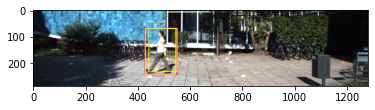

In [ ]:
index = 0
a = compute_once(index)

PSM Cos Volume takes 0.0037751197814941406 seconds at call time 16
PSM Cos Volume takes 0.002786874771118164 seconds at call time 17
Cost Volume takes 0.002665996551513672 seconds at call time 8


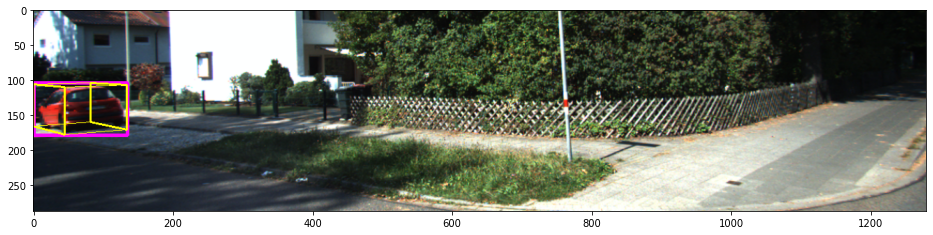

In [ ]:
#%matplotlib inline
fig = plt.figure(figsize=(16,9))
index += 1
a = compute_once(index, is_test_train=False, is_draw=True)